In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns 
import matplotlib.pyplot as plt 


In [3]:
MODEL_DIR = "model"
SALES_PATH = "../data/kc_house_data.csv"  # path to CSV with home sale data
DEMOGRAPHICS_PATH = '../data/zipcode_demographics.csv'

### Load original sales data set

In [4]:
df = pd.read_csv(SALES_PATH)
df.shape

(21613, 21)

In [5]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Check histograms of numeric columns

In [9]:
numeric_df = df.select_dtypes(include=[np.number])

<Figure size 1000x800 with 0 Axes>

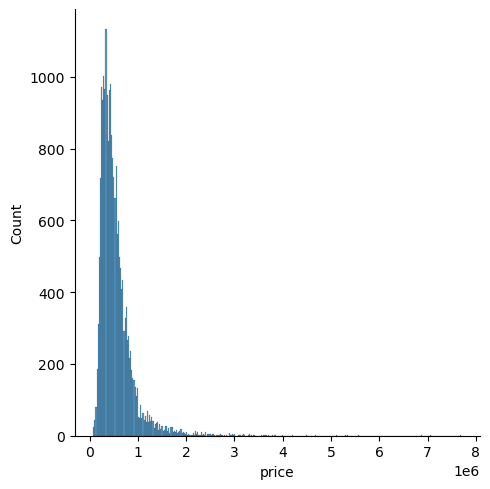

In [10]:
# for col in columns:
for col in [x for x in numeric_df if x=='price']:
    plt.figure(figsize = (10,8))
    sns.displot(df[col])
    plt.show()

The vast majority of house prices are between 0 and 1 million dollars.

There are some outliers in the prices.

For this exercise, and for time constraints we'll not reject them and rely in the mitigation effect of the `RobustScaler` pre-process included in the training pipeline.

### Find correlation price vs other features

<Axes: >

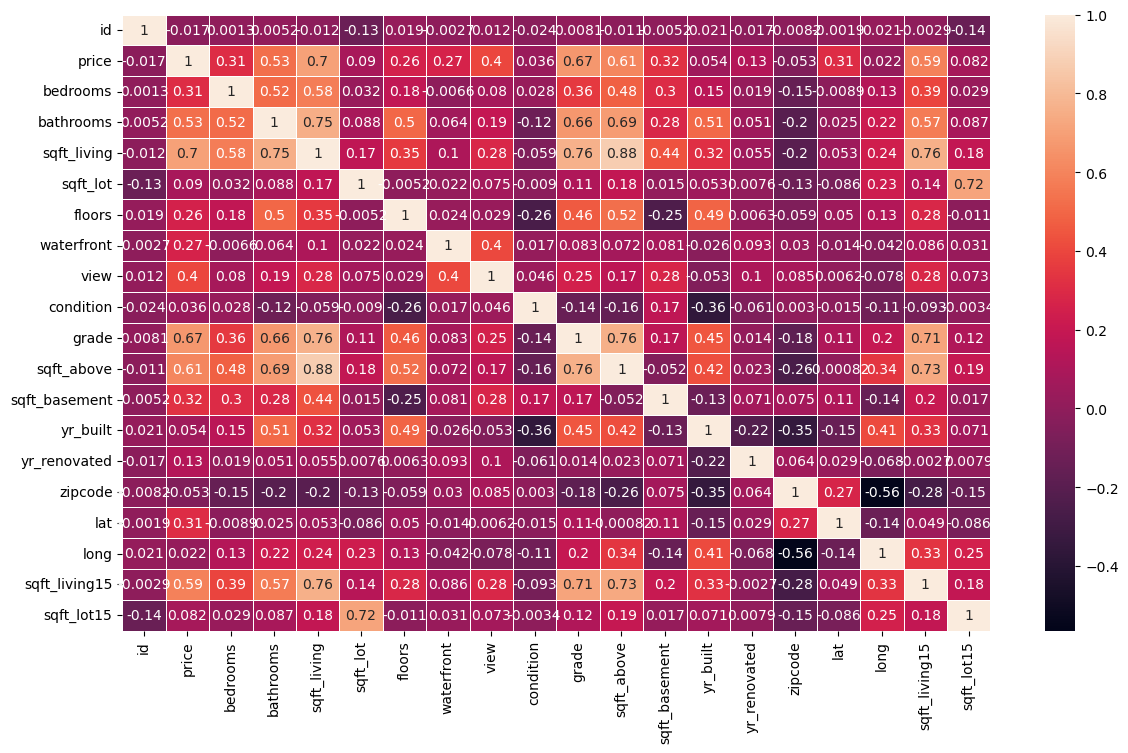

In [11]:
plt.figure(figsize = (14,8))
sns.heatmap(numeric_df.corr(), linewidths = 0.5, annot = True)

In [12]:
correlation = numeric_df.corr()["price"].sort_values(ascending=False)
correlation

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

### Check model performance when including/excluding features from sales data

In [13]:
import sys
import os

current_dir = os.path.dirname(os.path.abspath("eda.ipynb"))
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)

import numpy as np
import create_model as m
from sklearn import model_selection, neighbors, pipeline, preprocessing
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

def train(sales_column_selection, demographics_column_selection=None):
    x, y = m.load_data(SALES_PATH, DEMOGRAPHICS_PATH, sales_column_selection, demographics_column_selection)

    x_train, _x_test, y_train, _y_test = model_selection.train_test_split(
        x, y, test_size=0.2, random_state=42)

    model = pipeline.make_pipeline(preprocessing.RobustScaler(),
                                    neighbors.KNeighborsRegressor()).fit(
                                        x_train, y_train)

    y_pred = model.predict(_x_test)

    mae = mean_absolute_error(_y_test, y_pred)
    mse = mean_squared_error(_y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(_y_test, y_pred)

    print(f"Mean Absolute Error.....: {mae:,.2f}")
    print(f"Mean Squared Error......: {mse:,.2f}")
    print(f"Root Mean Squared Error.: {rmse:,.2f}")
    print(f"R-squared Score.........: {r2:.2f}")


def train_with_cross_validation(sales_column_selection, demographics_column_selection=None):
    x, y = m.load_data(SALES_PATH, DEMOGRAPHICS_PATH, sales_column_selection, demographics_column_selection)
    
    model = pipeline.make_pipeline(preprocessing.RobustScaler(), neighbors.KNeighborsRegressor())

    n_folds = 5
    
    scores_mae = cross_val_score(model, x, y, cv=n_folds, scoring='neg_mean_absolute_error')
    scores_mse = cross_val_score(model, x, y, cv=n_folds, scoring='neg_mean_squared_error')
    scores_r2 = cross_val_score(model, x, y, cv=n_folds, scoring='r2')

    # Compute mean scores
    mean_mae = np.mean(-scores_mae)  # Scores are negated to make them positive
    mean_mse = np.mean(-scores_mse)
    mean_rmse = np.sqrt(mean_mse)
    mean_r2 = np.mean(scores_r2)

    print(f"Cross-Validated Mean Absolute Error.....: {mean_mae:,.2f}")
    print(f"Cross-Validated Mean Squared Error......: {mean_mse:,.2f}")
    print(f"Cross-Validated Root Mean Squared Error.: {mean_rmse:,.2f}")
    print(f"Cross-Validated R-squared Score.........: {mean_r2:.2f}")



#### Model performance (baseline)

In [14]:
ORIGINAL_SALES_COLUMN_SELECTION = [
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'zipcode'
]

In [15]:
print("Train:")
train(ORIGINAL_SALES_COLUMN_SELECTION)
print("\nTrain with cross validation:")
train_with_cross_validation(ORIGINAL_SALES_COLUMN_SELECTION)

Train:
Mean Absolute Error.....: 101,072.98
Mean Squared Error......: 39,853,304,151.22
Root Mean Squared Error.: 199,632.92
R-squared Score.........: 0.74

Train with cross validation:
Cross-Validated Mean Absolute Error.....: 96,877.06
Cross-Validated Mean Squared Error......: 34,386,291,407.95
Cross-Validated Root Mean Squared Error.: 185,435.41
Cross-Validated R-squared Score.........: 0.74


#### Model Performance with Different Sales Feature Selection

Since our goal is not to achieve the absolute best predictive performance and due to some time constraints, in this exercise I will focus on improving the model's performance by enhancing the feature selection process. Here's the approach:

1. Evaluate the original list of sales features to identify those with a high absolute value of the correlation coefficient. Retain these features.
2. Consider adding other features with a strong correlation coefficient and assess the impact on performance metrics. If performance improves, these features will be included.

I acknowledge that performing feature importance analysis, evaluating other learning algorithms, and conducting additional hyperparameter tuning using GridSearchCV could lead to further improvements.

In [16]:
sales_column_selection = [
    # original
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'zipcode',
    # added
    'grade', 
]
print("Train:")
train(sales_column_selection)
print("\nTrain with cross validation:")
train_with_cross_validation(sales_column_selection)

Train:
Mean Absolute Error.....: 92,863.03
Mean Squared Error......: 35,133,954,708.00
Root Mean Squared Error.: 187,440.54
R-squared Score.........: 0.77

Train with cross validation:
Cross-Validated Mean Absolute Error.....: 89,423.95
Cross-Validated Mean Squared Error......: 30,603,828,886.65
Cross-Validated Root Mean Squared Error.: 174,939.50
Cross-Validated R-squared Score.........: 0.77


#### 

In [17]:
sales_column_selection = [
    # original
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'zipcode',
    # added
    'grade', 'sqft_living15',
]
print("Train:")
train(sales_column_selection)
print("\nTrain with cross validation:")
train_with_cross_validation(sales_column_selection)

Train:
Mean Absolute Error.....: 90,541.11
Mean Squared Error......: 33,166,471,994.93
Root Mean Squared Error.: 182,116.64
R-squared Score.........: 0.78

Train with cross validation:
Cross-Validated Mean Absolute Error.....: 87,187.99
Cross-Validated Mean Squared Error......: 29,229,705,711.18
Cross-Validated Root Mean Squared Error.: 170,966.97
Cross-Validated R-squared Score.........: 0.78


In [18]:
sales_column_selection = [
    # original
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'zipcode',
    # added
    'grade', 'sqft_living15', 'view'
]
print("Train:")
train(sales_column_selection)
print("\nTrain with cross validation:")
train_with_cross_validation(sales_column_selection)

Train:
Mean Absolute Error.....: 88,461.35
Mean Squared Error......: 29,466,527,475.51
Root Mean Squared Error.: 171,658.17
R-squared Score.........: 0.81

Train with cross validation:
Cross-Validated Mean Absolute Error.....: 84,524.75
Cross-Validated Mean Squared Error......: 25,966,039,350.17
Cross-Validated Root Mean Squared Error.: 161,139.81
Cross-Validated R-squared Score.........: 0.81


In [19]:
demographics_df = pd.read_csv(DEMOGRAPHICS_PATH)

merged_data = numeric_df.merge(demographics_df, how="left",
                             on="zipcode").drop(columns="zipcode")

correlation2 = merged_data.corr()["price"].sort_values(ascending=False)
correlation2

price                     1.000000
sqft_living               0.702035
grade                     0.667434
sqft_above                0.605567
sqft_living15             0.585379
hous_val_amt              0.579733
medn_incm_per_prsn_amt    0.549911
bathrooms                 0.525138
per_prfsnl                0.500262
per_bchlr                 0.474896
view                      0.397293
sqft_basement             0.323816
bedrooms                  0.308350
lat                       0.307003
edctn_prfsnl_qty          0.291694
medn_hshld_incm_amt       0.272460
waterfront                0.266369
floors                    0.256794
edctn_bchlr_dgre_qty      0.209238
yr_renovated              0.126434
sqft_lot                  0.089661
sqft_lot15                0.082447
per_urbn                  0.068983
yr_built                  0.054012
condition                 0.036362
long                      0.021626
id                       -0.016762
per_sbrbn                -0.023602
sbrbn_ppltn_qty     

In [20]:
sales_column_selection = [
    # original
    'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
    'sqft_above', 'sqft_basement', 'zipcode',
    # added
    'grade', 'sqft_living15', 'view'
]
demographics_column_selection = list(demographics_df.columns)
demographics_column_selection.remove("per_sbrbn")
# demographics_column_selection.remove("sbrbn_ppltn_qty")

print("Train:")
train(sales_column_selection, demographics_column_selection)
print("\nTrain with cross validation:")
train_with_cross_validation(sales_column_selection, demographics_column_selection)

Train:
Mean Absolute Error.....: 88,461.35
Mean Squared Error......: 29,466,527,475.51
Root Mean Squared Error.: 171,658.17
R-squared Score.........: 0.81

Train with cross validation:
Cross-Validated Mean Absolute Error.....: 84,524.75
Cross-Validated Mean Squared Error......: 25,966,039,350.17
Cross-Validated Root Mean Squared Error.: 161,139.81
Cross-Validated R-squared Score.........: 0.81


In [21]:
print(sales_column_selection)
print(demographics_column_selection)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'zipcode', 'grade', 'sqft_living15', 'view']
['ppltn_qty', 'urbn_ppltn_qty', 'sbrbn_ppltn_qty', 'farm_ppltn_qty', 'non_farm_qty', 'medn_hshld_incm_amt', 'medn_incm_per_prsn_amt', 'hous_val_amt', 'edctn_less_than_9_qty', 'edctn_9_12_qty', 'edctn_high_schl_qty', 'edctn_some_clg_qty', 'edctn_assoc_dgre_qty', 'edctn_bchlr_dgre_qty', 'edctn_prfsnl_qty', 'per_urbn', 'per_farm', 'per_non_farm', 'per_less_than_9', 'per_9_to_12', 'per_hsd', 'per_some_clg', 'per_assoc', 'per_bchlr', 'per_prfsnl', 'zipcode']


### Conclusion
The selection of new sales columns has significantly enhanced the model's performance metrics.

However, modifications to the demographic columns have not yielded substantial changes, leading us to retain the original demographic column selection. 

Below is a comparative summary of the baseline results and the improvements achieved.

| Metric                                     | Baseline                | Improved               |
|--------------------------------------------|-------------------------|------------------------|
| Cross-Validated Mean Absolute Error        | 96,877.06               | 84,524.75              |
| Cross-Validated Mean Squared Error         | 34,386,291,407.95       | 25,966,039,350.17      |
| Cross-Validated Root Mean Squared Error    | 185,435.41              | 161,139.81             |
| Cross-Validated R-squared Score            | 0.74                    | 0.81                   |
